<a href="https://colab.research.google.com/github/joaolucasgl12/Projetos-/blob/main/Regress%C3%A3o/Custos_M%C3%A9dicos_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problema: Estimar o custo médico de clientes.
### Solução: Prever o custo médico de cada cliente.

Dataset: https://www.kaggle.com/mirichoi0218/insurance

 ## Traduções das   Colunas

**idade:** idade do beneficiário primário

**sexo:** gênero empreiteiro de seguros, feminino, masculino

**bmi**: Índice de massa corporal, proporcionando uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg / m ^ 2) utilizando a razão de altura para peso, idealmente 18,5 a 24,9

**crianças**: Número de crianças cobertas por seguro de saúde / Número de dependentes

**fumante**: Fumar

**região**: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

**Encargos**: Custos médicos individuais cobrados pelo seguro de saúde

In [ ]:
!pip install plotly==5.1.0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
base_seguro = pd.read_csv('/content/insurance.csv')
base_seguro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Subtituindo yes por 1 caso fume e 0 para os que não fume
base_seguro['smoker'] = base_seguro['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [ ]:
base_seguro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
base_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [ ]:
base_seguro.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


## Visualição Gráfica

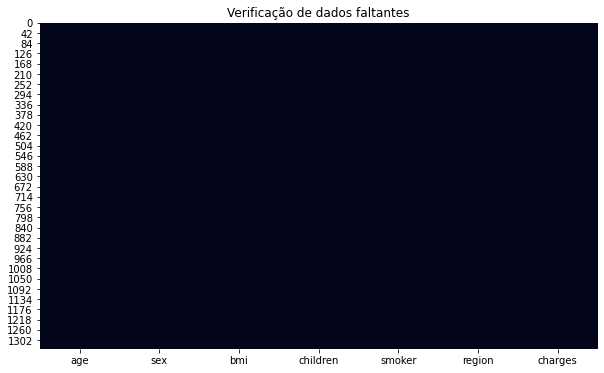

In [ ]:
plt.subplots(figsize=(10,6))
sns.heatmap(base_seguro.isnull(),cbar=False);
plt.title('Verificação de dados faltantes');

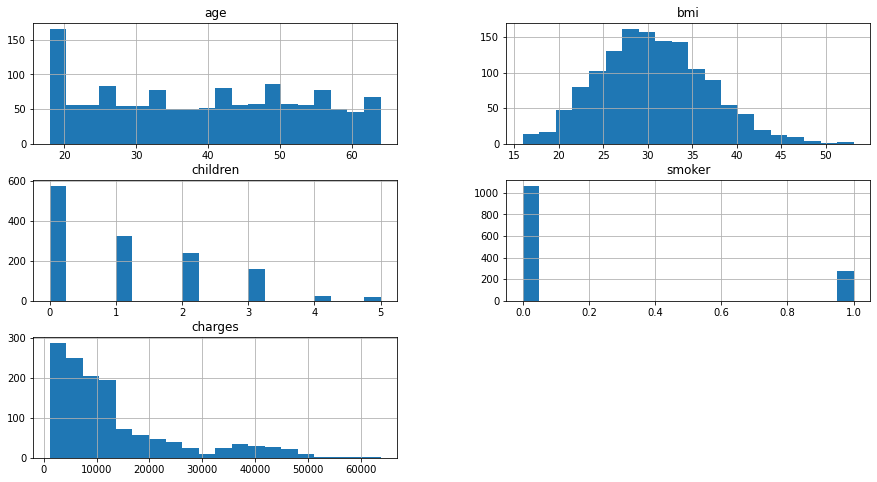

In [ ]:
base_seguro.hist(bins=20,figsize=(15,8),);

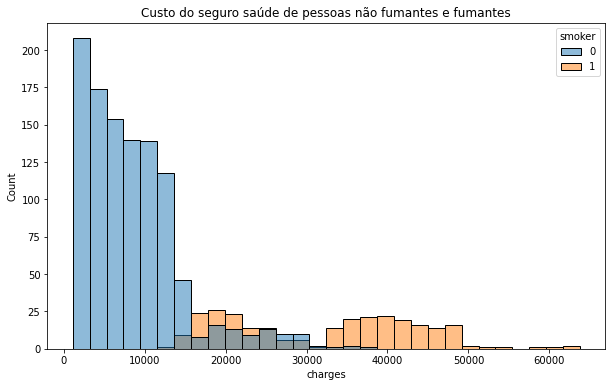

In [ ]:
plt.subplots(figsize=(10,6));
sns.histplot(x='charges',hue='smoker',data=base_seguro)
plt.title('Custo do seguro saúde de pessoas não fumantes e fumantes');

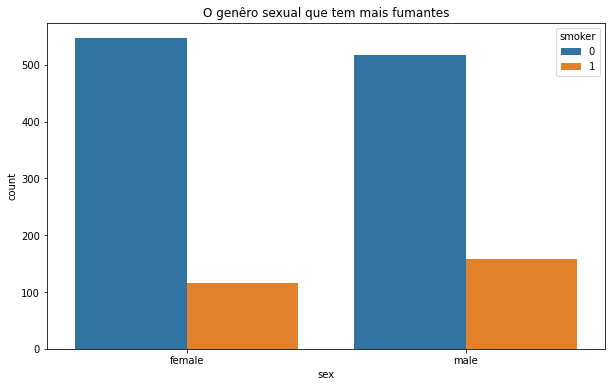

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot(x='sex',hue='smoker',data=base_seguro);
plt.title('O genêro sexual que tem mais fumantes');

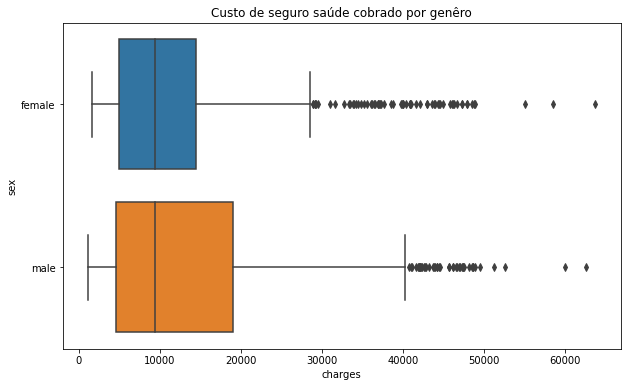

In [ ]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='charges',y='sex',data=base_seguro);
plt.title('Custo de seguro saúde cobrado por genêro');

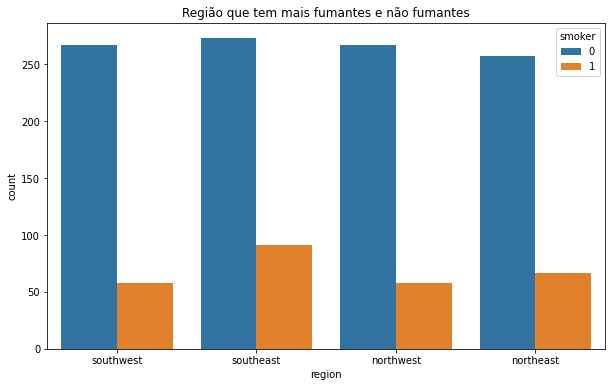

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot(x='region',hue='smoker',data=base_seguro);
plt.title('Região que tem mais fumantes e não fumantes');

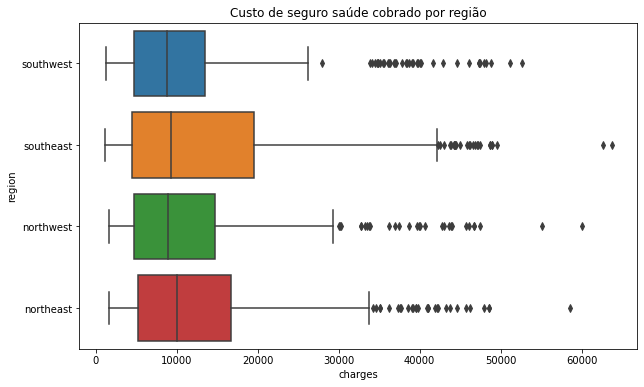

In [ ]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='charges',y='region',data=base_seguro);
plt.title('Custo de seguro saúde cobrado por região');
# a região southeast é que tem mais fumantes e a região que tem mais custos com seguro saúde.

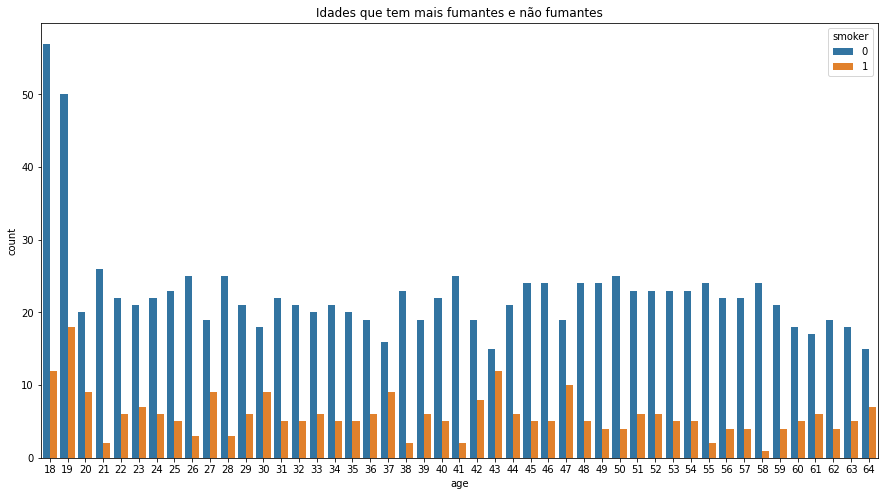

In [ ]:
plt.subplots(figsize=(15,8))
sns.countplot(x='age',hue='smoker',data=base_seguro);
plt.title('Idades que tem mais fumantes e não fumantes');

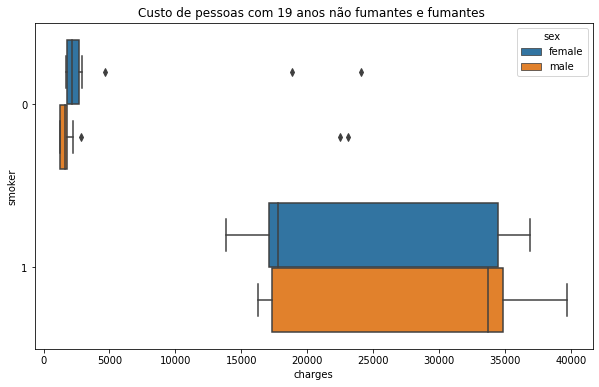

In [ ]:
plt.subplots(figsize=(10,6))
sns.boxplot(y="smoker", x="charges",hue='sex', data = base_seguro[(base_seguro.age == 19)] , orient="h")
plt.title("Custo de pessoas com 19 anos não fumantes e fumantes ");

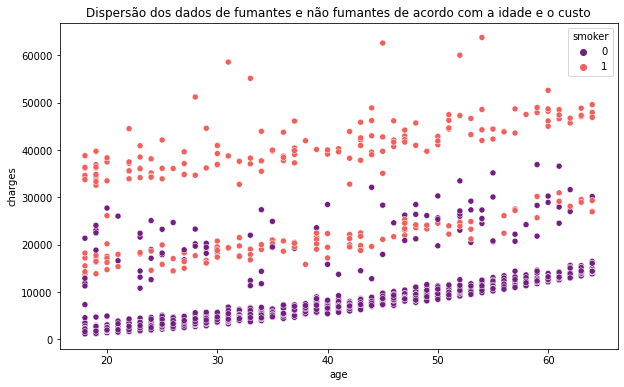

In [ ]:
plt.subplots(figsize=(10,6))
sns.scatterplot(x='age',y='charges',data=base_seguro,palette='magma',hue='smoker');
plt.title('Dispersão dos dados de fumantes e não fumantes de acordo com a idade e o custo');

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


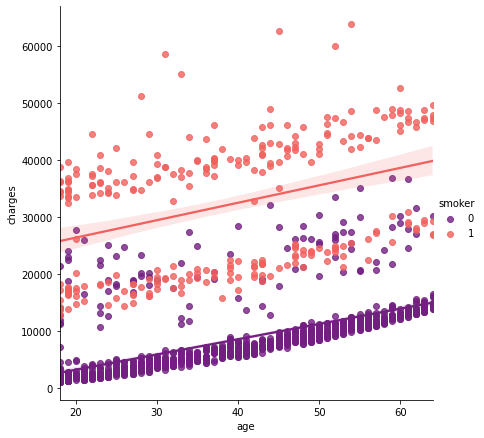

In [ ]:
sns.lmplot(x='age',y='charges',hue='smoker',data=base_seguro,palette='magma',size=6);

**Correlação**: é a medida de grau de relação entre duas variávies que varia de -1 até 1.

   * valores positivos - indica que quando uma variavel aumenta a outra também aumenta.

* valores negativos - indica que quando uma variável aumenta a outra diminue.


    (0,03 até 0,65) - correlação média
    (0,65 até 0,95) - correlação forte 
    (0,95 até 1) - correlação muito forte

OBS: as classificações de correlações serve tanto para valores positivos e negativos 

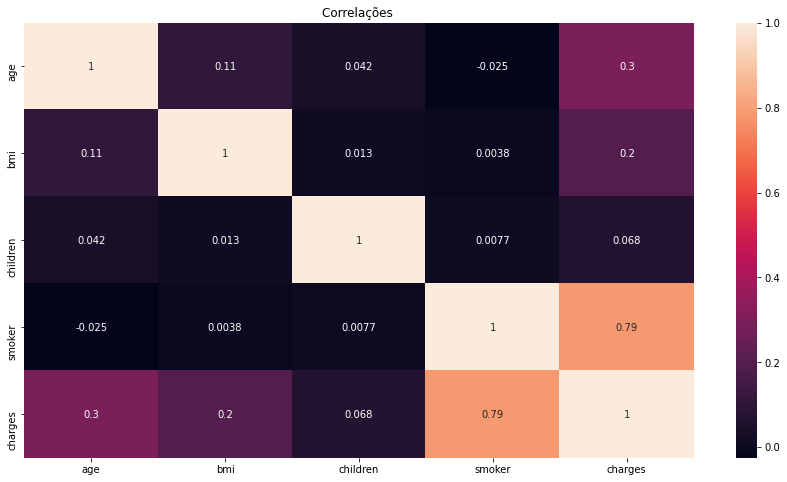

In [ ]:
correlacao = base_seguro.corr()
plt.subplots(figsize=(15,8));
sns.heatmap(correlacao,annot=True);
plt.title('Correlações ');

##Pré processamento

In [ ]:
base_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


### Aplicando o método get_dummies()
objetivo: transforma dados não númericos em númericos 

In [ ]:
# Transformando dados não numericos em númericos 
x = base_seguro.iloc[:,0:6]
x = pd.get_dummies(x).values
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
y = base_seguro[['charges']].values
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

### Separando os dados em um conjunto de treino e de teste

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 0) # usando 25% dos dados para teste e random para garantir que usará os mesmos dados

In [ ]:
x_train.shape,y_train.shape

(array([[32.  , 29.59,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [61.  , 22.04,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [19.  , 24.6 ,  1.  , ...,  0.  ,  0.  ,  1.  ],
        ...,
        [40.  , 25.08,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [19.  , 35.53,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [33.  , 18.5 ,  1.  , ...,  0.  ,  0.  ,  1.  ]]), (1003, 1))

In [ ]:
x_test.shape ,y_test.shape

(array([[52.   , 30.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ],
        [47.   , 29.37 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
        [48.   , 40.565,  2.   , ...,  1.   ,  0.   ,  0.   ],
        ...,
        [51.   , 30.03 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
        [23.   , 37.1  ,  3.   , ...,  0.   ,  0.   ,  1.   ],
        [61.   , 29.07 ,  0.   , ...,  1.   ,  0.   ,  0.   ]]), (335, 1))

### Normalizando os dados 
Para evitar que as varivéis com escalas maiores tenha uma influência sobre as outras variáveis.

o método usado é o StandardScaler -> subtrai o valor em questão pela a média da coluna e divide pelo o desvio padrão (valor - média) / desvio padrão. 

In [ ]:
# normalizando as variáveis 'age','children','bmi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[:,[0,1,2]] = scaler.fit_transform(x_train[:,[0,1,2]]) 

x_test_scaled = x_test.copy()
x_test_scaled[:,[0,1,2]] = scaler.transform(x_test_scaled[:,[0,1,2]])



## Regressao multipla
é modelagem entre variáveis númericas , seu objetivo é  encontrar o B0 que o coeficiente da reta, os coeficientes das variaveis explanátorias e encontrar a melhor reta que encaixe nos dados .

usando a **equação da reta:**

y= b0 + b1 . x1 + b2 . x2....

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
previsao_linear = regressor_linear.predict(x_test_scaled)
previsao_linear.shape

(335, 1)

In [ ]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [ ]:
# B0 -> Coeficiente linear 
regressor_linear.intercept_

array([8461.6355048])

In [ ]:
# B1,B2.... -> Coeficientes das variáveis explanatorias 
regressor_linear.coef_

array([[ 3.51541626e+03,  2.07657350e+03,  5.33728116e+02,
         2.36566205e+04, -6.63153624e+00,  6.63153624e+00,
         5.35344576e+02,  3.42211643e+02, -5.44457080e+02,
        -3.33099139e+02]])

In [ ]:
# Accuracy
regressor_linear_score = regressor_linear.score(x_test_scaled,y_test)
regressor_linear_score

0.7958786376014415

In [ ]:
# Usando o método root mean squared error - a soma das diferença dos erros elevada ao quadrado e depois elevar raiz quadrada
from sklearn.metrics import mean_squared_error
error_linear = np.sqrt(mean_squared_error(y_test,previsao_linear))
error_linear

5668.8400259119835

## Regressao Polynomial

é a modelagem entre variáveis númericas e seu objetivo é encontrar o B0 que o coeficiente da reta, os coeficientes das variaveis explanátorias e encontrar a melhor reta que encaixe nos dados .

usando a mesma da equação da reta linear sendo que elevando as variavéis explanattorias ao quadrado :

y= b0 + b1 . x1 + b2 . x1² + b3 . x2 + b4 .x2² ... 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

In [ ]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
previsao_poly = regressor_poly.predict(x_test_poly)
previsao_poly

array([[11581.12402344],
       [10271.38964844],
       [50273.74902344],
       [15070.90527344],
       [ 7648.93652344],
       [ 4840.27246094],
       [ 4504.62402344],
       [14826.56152344],
       [10581.68652344],
       [ 8846.40527344],
       [ 8369.56152344],
       [11974.43652344],
       [ 8835.78027344],
       [ 5560.88964844],
       [25434.34277344],
       [12530.99902344],
       [12968.81152344],
       [ 6110.40527344],
       [ 9288.98339844],
       [28099.90527344],
       [26556.62402344],
       [15030.90527344],
       [11645.71777344],
       [29747.21777344],
       [ 3408.20996094],
       [ 7346.26464844],
       [ 3958.65527344],
       [ 9492.40527344],
       [ 5156.18652344],
       [11350.48339844],
       [10816.56152344],
       [52344.18652344],
       [14675.34277344],
       [11849.84277344],
       [14348.48339844],
       [ 6242.34277344],
       [10225.68652344],
       [36933.90527344],
       [36870.37402344],
       [ 2574.49902344],


In [ ]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [ ]:
# B0 -> valor constante
regressor_poly.intercept_

array([7.43078967e+12])

In [ ]:
# Coeficentes 
regressor_poly.coef_

array([[-8.88663514e+10,  1.07320111e+14,  3.62528492e+14,
         1.28323743e+14,  1.84428058e+14,  5.47755676e+14,
         1.80598441e+14,  1.00031397e+12, -1.57638744e+14,
         2.83441964e+13, -1.60294039e+14,  5.92499852e+02,
         7.10621655e+01,  1.04198924e+01,  1.01847083e+02,
        -1.84516499e+14, -1.84516499e+14,  7.71963883e+13,
         7.71963883e+13,  7.71963883e+13,  7.71963883e+13,
        -3.06333384e+02,  1.34044302e+02,  8.95345750e+03,
         1.00804921e+13,  1.00804921e+13, -3.72608984e+14,
        -3.72608984e+14, -3.72608984e+14, -3.72608984e+14,
        -1.27053255e+02, -5.91638017e+02, -4.81839616e+13,
        -4.81839616e+13, -8.01397815e+13, -8.01397815e+13,
        -8.01397815e+13, -8.01397815e+13, -4.53102678e+13,
        -2.00902693e+14, -2.00902693e+14,  6.17849028e+13,
         6.17849028e+13,  6.17849028e+13,  6.17849028e+13,
        -9.65037865e+13,  0.00000000e+00, -2.01437812e+14,
        -2.09057893e+14, -6.80339097e+14, -1.33924862e+1

In [ ]:
# accuraccy
regressor_poly_score = regressor_poly.score(x_test_poly,y_test)
regressor_poly_score

0.8841877073357676

In [ ]:
erro_poly = np.sqrt(mean_squared_error(y_test,previsao_poly))
erro_poly

4269.994364254148

## Regressão Arvore De Decisão

objetivo: emitir uma serie de regras através do ganho de informação. o atributo mais importante ficará no topo.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor()
regressor_arvore.fit(x_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
previsao_arvore = regressor_arvore.predict(x_test_scaled)
previsao_arvore

array([10085.846  ,  8233.0975 , 44202.6536 , 13429.0354 ,  9264.797  ,
        5116.5004 ,  2196.4732 , 10560.4917 ,  7209.4918 ,  6128.79745,
        4766.022  , 30284.64294,  7345.084  ,  4779.6023 , 18033.9679 ,
        8703.456  , 12124.9924 ,  3292.52985,  6455.86265, 33900.653  ,
       24667.419  , 12495.29085, 10564.8845 , 27218.43725, 11482.63485,
        4462.7218 ,  3558.62025,  7209.4918 ,  3757.8448 ,  8027.968  ,
        7201.70085, 48673.5588 , 13393.756  , 10713.644  , 15359.1045 ,
        3972.9247 ,  8978.1851 , 35585.576  , 39983.42595,  1391.5287 ,
        7228.21565,  3866.8552 , 21659.9301 , 49577.6624 , 37165.1638 ,
        3579.8287 ,  8703.456  ,  7153.5539 ,  4719.52405, 27117.99378,
        2690.1138 ,  3537.703  , 27218.43725, 44641.1974 , 11856.4115 ,
        2689.4954 ,  3292.52985,  8932.084  ,  7726.854  , 13937.6665 ,
        1252.407  , 46130.5265 , 12928.7911 , 10118.424  , 26392.26029,
        9877.6077 , 33900.653  , 39983.42595,  2913.569  ,  9222

In [ ]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [ ]:
regressor_arvore.feature_importances_ # as features mais importantes (age,bmi,children,smoker)

array([0.12585846, 0.21797118, 0.0232448 , 0.60412933, 0.00379597,
       0.00403409, 0.00247579, 0.00651797, 0.00753258, 0.00443984])

In [ ]:
regressor_arvore_score = regressor_arvore.score(x_test_scaled,y_test)
regressor_arvore_score

0.7316931953663369

In [ ]:
erro_arvore = np.sqrt(mean_squared_error(y_test,previsao_arvore))
erro_arvore

6499.288504591726

## Regressor Random Forest
objetivo: vai emitir varias arvores de decisao e usar a média dos resultados para dar a resposta final

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random = RandomForestRegressor()
regressor_random.fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
previsao_random = regressor_random.predict(x_test_scaled)
previsao_random

array([10526.3415755 ,  9788.3194439 , 45437.5112626 , 12996.139159  ,
        9892.206038  ,  9891.8750921 ,  2303.9606975 , 11966.3976013 ,
        6957.1555345 ,  6165.282313  ,  7840.4236492 , 18006.6895027 ,
        7629.4039044 ,  5918.531393  , 23064.1395406 , 14416.9265861 ,
       12909.6586317 ,  7020.0743079 ,  6632.5299433 , 34092.1734165 ,
       23980.4734125 , 16376.5881313 , 10863.1911563 , 27164.3837809 ,
        4569.1693612 , 11327.809264  ,  7103.7626847 ,  8121.9079497 ,
        4021.1756609 , 11662.4581757 ,  7582.9056428 , 48387.2844056 ,
       14046.457055  , 10899.0059202 , 16605.0085596 ,  4257.8691449 ,
        8907.1756631 , 37557.6472893 , 40540.3177213 ,  4623.8011833 ,
        8552.8812019 ,  4040.4720346 , 21174.3480356 , 48080.5460693 ,
       36704.9325161 ,  6165.6970295 , 14545.7724488 ,  6918.816905  ,
        6759.184522  , 14169.2391727 ,  3467.6542975 , 13617.616987  ,
       27151.7331105 , 48662.7686279 , 11673.7859205 ,  8118.0100084 ,
      

In [ ]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [ ]:
regressor_random.feature_importances_

array([0.13813707, 0.21000845, 0.02096128, 0.60353438, 0.00374018,
       0.00390578, 0.00495337, 0.0060253 , 0.00473151, 0.00400268])

In [ ]:
regressor_random_score = regressor_random.score(x_test_scaled,y_test)
regressor_random_score

0.8778504810750649

In [ ]:
erro_random = np.sqrt(mean_squared_error(y_test,previsao_random))
erro_random

4385.265100260194

In [ ]:
print(f'Regressão linear_score =  {regressor_linear_score} | RMSE = {error_linear}\n')
print(f'Regressão polinomial_score = {regressor_poly_score} | RMSE = {erro_poly}\n')
print(f'Regressão arvore_score = {regressor_arvore_score} | RMSE = {erro_arvore}\n')
print(f'Regressão random_score = {regressor_random_score} | RMSE = {erro_random}')

Regressão linear_score =  0.7958786376014415 | RMSE = 5668.8400259119835

Regressão polinomial_score = 0.8841877073357676 | RMSE = 4269.994364254148

Regressão arvore_score = 0.7316931953663369 | RMSE = 6499.288504591726

Regressão random_score = 0.8778504810750649 | RMSE = 4385.265100260194


## Tuning com GrindSeach
objetivo: encontrar os melhores parâmetros para tentar melhorar os  resultados de cada algoritmo  

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros_linear = {'n_jobs':['none',5,10,15]}

parametros_poly = {'n_jobs':['none',5,10,15]}

parametros_arvore = {'criterion' :["mse", "friedman_mse", "mae"], # função que irá fazer a separação dos dados 
                     'min_samples_split':[1,2,5], # número minimo de amostra para dividir um nó interno 
                     'min_samples_leaf':[1,3,5]}  # O número mínimo de amostras necessárias para estar em um nó de folha.

parametros_random_forest = {'criterion':["mse","mae"],     # função que irá fazer a separação dos dados para gerar as arvores
                            'n_estimators':[10,20,50,100,150],  # número de arvores a ser gerada 
                            'min_samples_split':[1,2,5],        
                            'min_samples_leaf':[1,3,5]} 



In [ ]:
# regressão linear
grindseach_linear = GridSearchCV(estimator=LinearRegression(),param_grid=parametros_linear)
grindseach_linear.fit(x_train,y_train)
melhores_parametros_linear = grindseach_linear.best_params_
melhor_resultado_linear = grindseach_linear.best_score_

# regressão poly
grindseach_poly = GridSearchCV(estimator=LinearRegression(),param_grid=parametros_poly)
grindseach_poly.fit(x_train,y_train)
melhores_parametros_poly = grindseach_poly.best_params_
melhor_resultado_poly = grindseach_poly.best_score_

# regressão arvore
grindseach_arvore = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=parametros_arvore)
grindseach_arvore.fit(x_train,y_train)
melhores_parametros_arvore = grindseach_arvore.best_params_
melhor_resultado_arvore = grindseach_arvore.best_score_

# regressão random
grindseach_random = GridSearchCV(estimator=RandomForestRegressor(),param_grid=parametros_random_forest)
grindseach_random.fit(x_train,y_train)
melhores_parametros_random = grindseach_random.best_params_
melhor_resultado_random = grindseach_random.best_score_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

In [ ]:
print(f'Regressão_Linear_parametros: {melhores_parametros_linear} e egressão_Linear_resultado: {melhor_resultado_linear}\n') 
print(f'Regressão_Poly_parametros: {melhores_parametros_poly} e Regressão_Poly_resultado:{melhor_resultado_poly}\n') 
print(f'Regressão_Arvore_parametros:{melhores_parametros_arvore} e Regressão_Arvore_resultado: {melhor_resultado_arvore}') # melhorou 
print(f'Regressão_Forest_parametros: {melhores_parametros_random} e Regressão_Forest_resultado:{melhor_resultado_random}\n') 

Regressão_Linear_parametros: {'n_jobs': 'none'} e egressão_Linear_resultado: 0.7219210360943333

Regressão_Poly_parametros: {'n_jobs': 'none'} e Regressão_Poly_resultado:0.7219210360943333

Regressão_Arvore_parametros:{'criterion': 'mae', 'min_samples_leaf': 5, 'min_samples_split': 5} e Regressão_Arvore_resultado: 0.819251264124446
Regressão_Forest_parametros: {'criterion': 'mae', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150} e Regressão_Forest_resultado:0.8385859403118532



## Kfolds e Validação Cruzada 
objetivo: testando K vezes para encontrar os melhores registros para treinamento e para teste.

In [ ]:
# passando todos a base de dados x e y para aplicar na validação cruzada
x_base_seguro = np.concatenate([x_train_scaled,x_test_scaled])
y_base_seguro = np.concatenate([y_train,y_test])

x_base_seguro_poly = np.concatenate([x_train_poly,x_test_poly])



In [ ]:
from sklearn.model_selection import cross_val_score,KFold

resultados_linear = []
resultados_poly = []
resultados_arvore = []
resultados_random = []

for i in range(30):
  kfold = KFold(n_splits=10,shuffle=True,random_state=i) # dividir a base em 10 vezes e sair testando uma por uma 
  score = cross_val_score(LinearRegression(),x_base_seguro,y_base_seguro,cv=kfold)
  resultados_linear.append(score.mean()) # passando todas as médias de resultados testadas

  score = cross_val_score(LinearRegression(),x_base_seguro_poly,y_base_seguro,cv=kfold)
  resultados_poly.append(score.mean()) # passando todas as médias de resultados testadas 

  # Pegando os melhores parâmetros do tuning testadas para arvore (resultado foi melhor )
  score = cross_val_score(DecisionTreeRegressor(criterion='mae',min_samples_leaf=5,min_samples_split=2),x_base_seguro,y_base_seguro,cv=kfold) 
  resultados_arvore.append(score.mean()) # passando todas as médias de resultados testadas 

  score = cross_val_score(RandomForestRegressor(),x_base_seguro,y_base_seguro,cv=kfold) 
  resultados_random.append(score.mean()) # passando todas as médias de resultados testadas 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
resultados = {'Regressao_Linear':resultados_linear,'Regressao_Polynomial':resultados_poly,
              'Regressao_Arvore':resultados_arvore,'Regressao_Random':resultados_random}
resultados = pd.DataFrame(resultados)
resultados

,Regressao_Linear,Regressao_Polynomial,Regressao_Arvore,Regressao_Random
0,0.741524,0.834945,0.839751,0.836732
1,0.744483,0.836299,0.838862,0.832149
2,0.734720,0.829372,0.840246,0.830224
3,0.743844,0.835756,0.836771,0.835911
4,0.740252,0.831931,0.838337,0.830343
5,0.740658,0.832276,0.840308,0.835966
6,0.741685,0.834876,0.841635,0.835965
7,0.742388,0.835480,0.838032,0.834980
8,0.736059,0.826695,0.825624,0.827619
9,0.741720,0.836040,0.842976,0.839961


In [ ]:
resultados.describe()

,Regressao_Linear,Regressao_Polynomial,Regressao_Arvore,Regressao_Random
count,30.000000,30.000000,30.000000,30.000000
mean,0.741615,0.833661,0.840653,0.835366
std,0.003015,0.004311,0.004549,0.003280
min,0.734720,0.816330,0.825624,0.827619
25%,0.739664,0.832408,0.838468,0.833406
50%,0.741703,0.835096,0.840399,0.835616
75%,0.744147,0.836013,0.842901,0.837314
max,0.746604,0.837875,0.849840,0.841208


In [ ]:
# Coeficiente de varição - > indica a porcentagem de variação em relação a média 
(resultados.std()/resultados.mean()) * 100

Regressao_Linear        0.406504
Regressao_Polynomial    0.517150
Regressao_Arvore        0.541119
Regressao_Random        0.392644
dtype: float64

## Teste de normalidade dos dados resultados
**p-values** >= **alpha** ( distribuição normal)

**p-values** < **alpha** ( distribuição não normal )

caso tenha dados com distribuição não normal, aplico o teste paramétrico 
(saber se há diferença estatística ou não)

In [ ]:
from scipy.stats import shapiro
alpha = 0.05
shapiro(resultados_linear),shapiro(resultados_poly),shapiro(resultados_arvore),shapiro(resultados_random) # p-values de cada algoritmo

((0.9608325958251953, 0.3252757489681244),
 (0.7328418493270874, 4.867044026468648e-06),
 (0.9397421479225159, 0.08951596915721893),
 (0.9810047149658203, 0.8515981435775757))

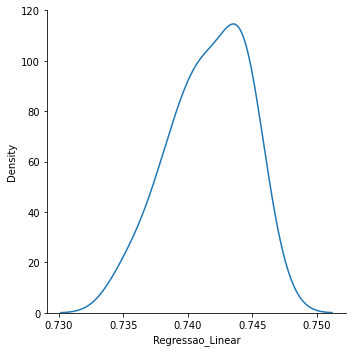

In [ ]:
sns.displot(x= resultados['Regressao_Linear'], kind='kde');

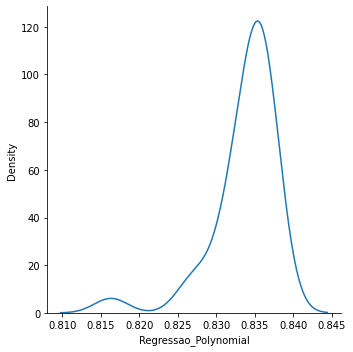

In [ ]:
sns.displot(x= resultados['Regressao_Polynomial'], kind='kde');

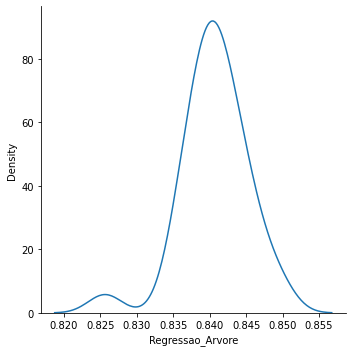

In [ ]:
sns.displot(x= resultados['Regressao_Arvore'], kind='kde');

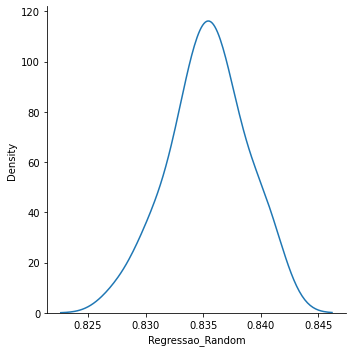

In [ ]:
sns.displot(x= resultados['Regressao_Random'], kind='kde');

## Teste de hipótese Anova
objetico: saber se há diferença estatística ou não

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore,resultados_linear,resultados_poly,resultados_random) # pegar so o p-values
p

2.480563891538396e-120

In [ ]:
if p >= alpha:
  print('hipótese alternativa descartada. não há diferença estatística')
elif p < alpha:
  print('hipótese nula descartada. há diferença estatística')

hipótese nula descartada. há diferença estatística


## Turke
objetivo: saber qual é o melhor algoritmo , já que teve diferença estatística 

In [ ]:
# Passando todos os resultados de cada algoritmo para fazer um dataframe com seus respectivos resultados testados
resultados_algoritmos = {'accuracy':np.concatenate([resultados_linear,resultados_poly,resultados_arvore,resultados_random]),
                         'algoritmos':['Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear',
                                       'Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly',
                                       'Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore',
                                       'Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random']}

resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,accuracy,algoritmos
0,0.741524,Regressao_Linear
1,0.744483,Regressao_Linear
2,0.734720,Regressao_Linear
3,0.743844,Regressao_Linear
4,0.740252,Regressao_Linear
...,...,...
115,0.834595,Regressao_Random
116,0.841208,Regressao_Random
117,0.834681,Regressao_Random
118,0.836237,Regressao_Random


In [ ]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
compara_algoritmo = MultiComparison(resultados_algoritmos['accuracy'],resultados_algoritmos['algoritmos'])

In [ ]:
teste_algoritmo = compara_algoritmo.tukeyhsd()
print(teste_algoritmo)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Regressao_Arvore Regressao_Linear   -0.099  0.001 -0.1016 -0.0964   True
Regressao_Arvore   Regressao_Poly   -0.007  0.001 -0.0096 -0.0044   True
Regressao_Arvore Regressao_Random  -0.0053  0.001 -0.0079 -0.0027   True
Regressao_Linear   Regressao_Poly    0.092  0.001  0.0895  0.0946   True
Regressao_Linear Regressao_Random   0.0938  0.001  0.0912  0.0963   True
  Regressao_Poly Regressao_Random   0.0017 0.3197 -0.0009  0.0043  False
------------------------------------------------------------------------


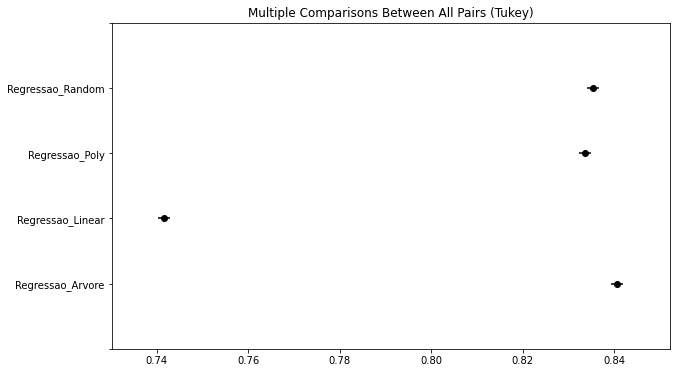

In [ ]:
teste_algoritmo.plot_simultaneous();

## Pegando os três melhores algoritmos

In [ ]:
classificador_arvore = DecisionTreeRegressor(criterion='mae',min_samples_leaf=5,min_samples_split=2)
classificador_arvore.fit(x_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
classificador_random = RandomForestRegressor()
classificador_random.fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
classificador_poly = LinearRegression()
classificador_poly.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Salvando para produção 

In [ ]:
import pickle
pickle.dump(classificador_arvore,open('classificador_arvore_finalizado.sav','wb'))
pickle.dump(classificador_random,open('classificador_random_finalizado.sav','wb'))
pickle.dump(classificador_poly,open('classificador_poly_finalizado.sav','wb'))